# Simple Linear Regression Analysis

In this notebook we are using the 'Greece - Agriculture and Rural Development' dataset to perform a Simple Linear Regression analysis.

## Import packages and classes
Starting with Scikit-learn or simply sklearn, we will use the **LinearRegression()** function to fit a linear regression model. We start by including the required libraries and classes:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

The $pandas$ and $numpy$ libraries will be used for loading and preprocessing the data. We use the $matplotlib$ library for creating plots to better visualize the results. From $sklearn$ we import the $linear\_model.LinearRegression$ for creating our model, the $model\_selection.train\_test\_split$ function for splitting the dataset into **Train** and **Test sets** and the $metrics$ for calculating metrics like the *Root Mean Square Error*. Lastly, we import the $statsmodels.api$ for evaluating the model's performance.

## Load dataset
We continue by loading the *Greece - Agriculture and Rural Development* dataset as a pandas frame using the $read\_csv()$ function.
For pure presenting purpuses we set the maximum number of columns that can be printed to 10 and using the *head()* function, we can view the first 5 rows of the dataset:

In [2]:
data = pd.read_csv('./../../../Datasets/Greece - Agriculture and Rural Development/agriculture-and-rural-development_grc.csv', usecols=None)
pd.set_option('display.max_columns', 10)
data.head()

,Year,"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),...,Rural population,Rural population (% of total population),Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
0,1960,NaN,NaN,NaN,NaN,...,3671291,44.064,NaN,NaN,NaN
1,1961,NaN,NaN,69.123351,89100.0,...,3657099,43.547,-0.387316,NaN,131960.0
2,1962,NaN,NaN,69.061288,89020.0,...,3604016,42.660,-1.462143,NaN,131960.0
3,1963,NaN,NaN,69.984484,90210.0,...,3542618,41.778,-1.718278,NaN,131960.0
4,1964,NaN,NaN,69.751746,89910.0,...,3480851,40.901,-1.758920,NaN,131960.0


During the analysis of the dataset we saw that the data contains a lot of $NaN$ values. If we try to fit data containing $NaN$ values to the *Scikit-learn* $LinearRegression()$ function, it will throw a *ValueError* with the message *'Input contains NaN, infinity or a value too large for dtype('float64')'*.

## Select variables & Drop NaN values


In [3]:
variable_x = "Crop production index (2014-2016 = 100)"
variable_y = "Cereal production (metric tons)"
data = data[[variable_x, variable_y]].dropna().reset_index(drop=True)
print("Shape of dataset: ", data.shape)
data.head()

Shape of dataset:  (58, 2)


,Crop production index (2014-2016 = 100),Cereal production (metric tons)
0,62.570000,2243876.0
1,50.700001,2426843.0
2,57.430000,2122537.0
3,57.150002,2874641.0
4,61.770000,2940922.0


To handle this, we extracted the variables we need for our analysis,*Crop production index (2014-2016 - 100)* and *Cereal production (metric tons)* and drop the rows that contain $NaN$ values using the $dropna()$ function. The $reset\_index(drop=True)$ is used to reset the index of the dataframe. The $drop$ parameter is set to $True$ so that the initial indexing is dropped and not included in the dataframe as a new column. The remaining data consist of 58 samples that can be used for training and testing the model. 
Next, we split the remaining samples in train and test sets using the Scikit-learn's $train\_test\_split()$ function.

## Train-test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data[variable_x].to_numpy(), data[variable_y].to_numpy(), test_size=0.2, random_state=42)

The $test\_size$ parameter, sets the percentage of samples to use in the test split. We follow a 80-20 split, meaning we will use 80\% of samples for training and 20\% for testing the model, so we set the parameter to 0.2. The $random\_ state$ parameter, controls the shuffling applied to the data before the split step. 
We can now fit the data to the linear regression model using the $fit()$ function.

## Approach 1: Sklean Linear Regression

In [5]:
model = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

In [6]:
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

Intercept: -338797.33066389244
Slope: [51647.36492435]


The reason we are reshaping the training data, is that the fit function expects a training vector with shape $(n\_samples, n\_features)$, but our vector's shape is (58,). By reshaping we set the number of columns to 1. After fitting the data to the regression model, we print the intercept and the slope of the model.
We can now use the test set, we extracted earlier, and the trained model to make a prediction using the $predict()$ function.

## Prediction

In [7]:
y_pred = model.predict(X_test.reshape(-1, 1))
y_pred

array([2892778.27689108, 2960952.78282969, 5072813.50306327,
       3795574.38914547, 5177141.4008718 , 4196357.65725097,
       4998957.75545991, 4700952.6332232 , 4551691.78011489,
       3424746.29322712, 4813543.90451981, 2612849.65357026])

## Evaluation

Let's start the evaluation with the $score()$ function that calculates the accuracy of the model. The score is based on the coefficient of determination, i.e. *R^2*. The reason we don't need the actual predictions is because the $score()$ function calculates the predictions internally.

In [8]:
model.score(X_test.reshape(-1, 1), y_test)

0.8563623230919093

We can also use the $r2\_score()$, which does the same thing but needs the actual predicitons

In [9]:
print("R-Square value:", metrics.r2_score(y_test, y_pred))

R-Square value: 0.8563623230919093


We continue by calculating some more metrics like the **Mean Absolute Error, the Mean Square Error** and the **Room Mean Square Error**.

In [10]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 300467.2024049084
Mean Squared Error: 142457456683.55972
Root Mean Squared Error: 377435.36755789025


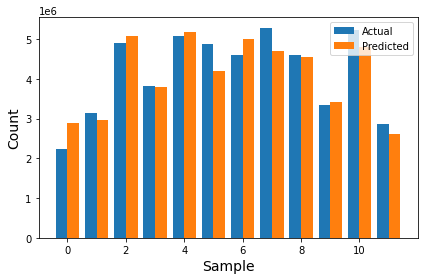

In [11]:
fig, ax = plt.subplots()
x_axis = np.arange(12)

plt.bar(x_axis-0.2, y_test, width=0.4, label = "Actual")
plt.bar(x_axis+0.2, y_pred, width=0.4, label = "Predicted")

plt.xlabel("Sample", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

## Approach 2: Statsmodels Linear Regression

In the second approach we will use $statsmodels.api$ method to train a linear regression model. In this approach we don't need to split our dataset into **train** and **test sets** as *statmodels* automatically performs the split internaly. However, we will use the $X\_train$ and $y\_train$ variables so that we can compare the results.

In [12]:
X_stat = sm.add_constant(X_train)
sm_res = sm.OLS(y_train, X_stat).fit()
sm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     127.6
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.36e-14
Time:                        08:50:05   Log-Likelihood:                -668.16
No. Observations:                  46   AIC:                             1340.
Df Residuals:                      44   BIC:                             1344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.388e+05   4.26e+05     -0.796      0.430    -1.2e+06    5.19e+05
x1          5.165e+04   4571.889     11.297      0.000    4.24e+04    6.09e+04
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.538
Skew:                          -0.082   Prob(JB):                        0.764
Kurtosis:                       2.496   Cond. No.                         534.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that *statsmodel* automatically calculated a variety of metrics and parameters using the $summary()$ function. Also, the $b\_0$ and $b\_1$ coefficients are the same as before.

As said, the data used in the *statsmodels* automatically splits the data in train and test. By calling the $prediction()$ we can print the actual predictions of the model.

In [26]:
sm_res.predict()

array([4784621.11221625, 5275787.6629775 , 2951656.24138179,
       4098227.9791252 , 3016732.03151714, 2851460.42435542,
       5239118.08116576, 4613668.46040885, 5385280.21847084,
       4857444.0858979 , 4749500.88830617, 5069198.2032801 ,
       3760454.16523539, 3294594.71295641, 4924069.23393487,
       4503659.71497372, 3702092.39068647, 5154416.43421291,
       5090373.81203736, 4784621.11221625, 5192118.78994633,
       3349857.37766394, 4780489.62249127, 4849696.90235162,
       4930266.66554136, 4244906.30637205, 4623997.77577847,
       2279724.1104044 , 4896696.19357106, 2627310.85270298,
       4773259.02292491, 5361005.8939103 , 5080560.68660955,
       4889465.59400472, 4707666.64880964, 3165992.88462546,
       4639492.14287103, 3867880.38480906, 3703125.55864631,
       4840400.3609037 , 2969216.55035589, 4789269.57995926,
       4113721.95217963, 5223107.5241314 , 4908058.28286241,
       5322270.37021704])

## Approach 3: Linear Regression by Hand
Apart from using a ready LinearRegression method to fit a model and make predictions, we can create, train and use our own model. In this example we will create our own Simple Linear Regression model to train and make predictions on given data.

In [22]:
class SimpleLinearRegression:

    def fit(self, x, y):
        """
        Training of the simple linear regression model
        
        Returns:
            The regression coefficients b0 and b1
        """
        
        assert np.size(x) == np.size(y)

        # number of observations
        n = np.size(x)

        # mean of x_train and y_train vectors
        m_x = np.mean(x)
        m_y = np.mean(y)

        # calculating regression coefficients b0 and b1
        self.b1_coeficient = (np.sum(y*x) - n*m_y*m_x) / (np.sum(x*x) - n*m_x*m_x)
        self.b0_coeficient = m_y - self.b1_coeficient*m_x

        return (self.b0_coeficient, self.b1_coeficient)

    def predict(self, x_test):
        """
        Making predictions based on given data using the pre-trained simple linear regression model.
        
        Parameters:
          x_test: float, array or series object the independent variable.
        
        Returns: 
            The prediction results
        """
        
        self.predictions = self.b0_coeficient + (self.b1_coeficient * x_test)
        
        return self.predictions

In the code above, we defined a class names **SimpleLinearRegression** and defined two funtions, $fit()$ and $predict()$. The $fit()$ function is called to initialied the training of the model and calculate the regression coefficients $b_0$ and $b_1$. It takes two parameters, the $x$ parameter holds the training data and the $y$ parameter the training labels. Lastly, the $predict()$ function takes one argument, $x\_test$, and is called to make predictions of the given data.

In [23]:
slr = SimpleLinearRegression()
slr.fit(X_train, y_train)

(-338797.3306638859, 51647.3649243486)

In [24]:
predictions = slr.predict(X_test)
predictions

array([2892778.27689108, 2960952.78282969, 5072813.50306327,
       3795574.38914547, 5177141.4008718 , 4196357.65725097,
       4998957.75545991, 4700952.6332232 , 4551691.78011489,
       3424746.29322712, 4813543.90451981, 2612849.65357026])

Let's recreate the barplot we plotted to visualise the results of the Sklearn library and compare them.

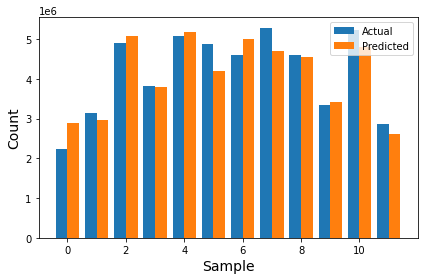

In [25]:
fig, ax = plt.subplots()
x_axis = np.arange(12)

plt.bar(x_axis-0.2, y_test, width=0.4, label = "Actual")
plt.bar(x_axis+0.2, predictions, width=0.4, label = "Predicted")

plt.xlabel("Sample", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

By a quick visual inspection we can see that the plots are identical, something we can accurately conclude by inspecting the actual predictions.